In [2]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv -P dataset


--2024-01-17 12:13:59--  https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15144 (15K) [text/plain]
Saving to: 'dataset/fandango_score_comparison.csv.1'

     0K .......... ....                                       100% 1.77M=0.008s

2024-01-17 12:14:00 (1.77 MB/s) - 'dataset/fandango_score_comparison.csv.1' saved [15144/15144]



In [3]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv -P dataset


--2024-01-17 12:14:00--  https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17468 (17K) [text/plain]
Saving to: 'dataset/fandango_scrape.csv.1'

     0K .......... .......                                    100% 13.5M=0.001s

2024-01-17 12:14:01 (13.5 MB/s) - 'dataset/fandango_scrape.csv.1' saved [17468/17468]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
fan_df = pd.read_csv('dataset/fandango_scrape.csv')
fan_df.head(4)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538


In [3]:
fan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [4]:
fan_df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


In [5]:
sns.set(style='darkgrid',palette='winter')

Finding Correlation between plots

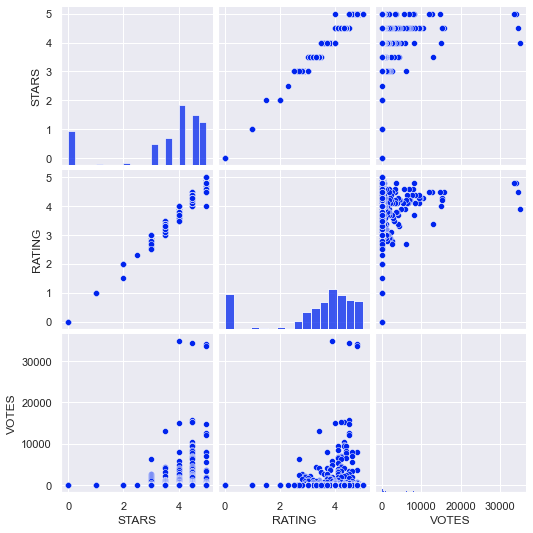

In [6]:
sns.pairplot(data=fan_df)
plt.savefig('fandango_pairplot.webp',bbox_inches='tight')

In [7]:
fan_df.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


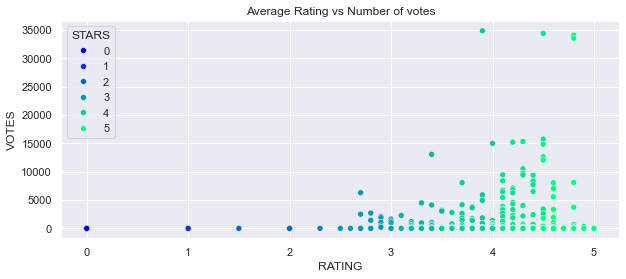

In [8]:
plt.figure(figsize=(10,4))
sns.scatterplot(
    data=fan_df,
    x='RATING',
    y='VOTES',
    hue='STARS',
    palette='winter'
).set_title('Average Rating vs Number of votes')

plt.savefig('fandango_ratingvsvotes.webp',bbox_inches='tight')

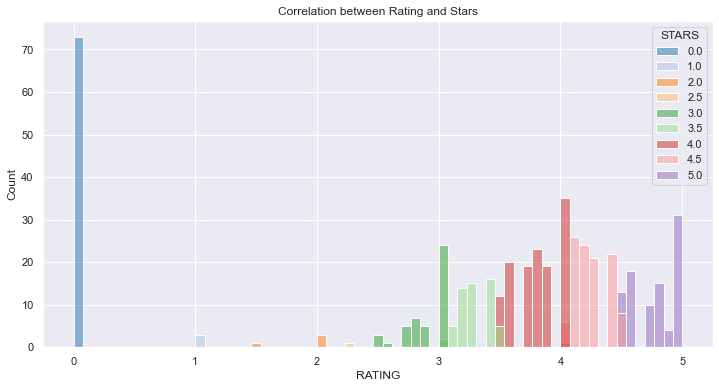

In [9]:
plt.figure(figsize=(12,6))
plt.title('Correlation between Rating and Stars')

sns.histplot(data=fan_df,x='RATING',bins=65,hue='STARS',palette='tab20',kde=False)

plt.savefig('assets/fan_df_RatingvsStars(hist).webp',bbox_inches='tight')

In [10]:
fan_df['YEAR'] = fan_df['FILM'].str.slice(-5,-1).replace('a (1','0000')

In [11]:
fan_df.drop(['YEAR'],axis=1,inplace=True)

In [12]:
fan_df['YEAR'] = fan_df['FILM'].apply(
    lambda x: x.replace('"','')
).apply(
    lambda x: x.replace('(1)', '(0000)')
).apply(
    lambda x: x[-5:-1]
)

In [13]:
fan_df['YEAR'].value_counts()

2015    478
2014     23
0000      7
2016      1
1964      1
Name: YEAR, dtype: int64

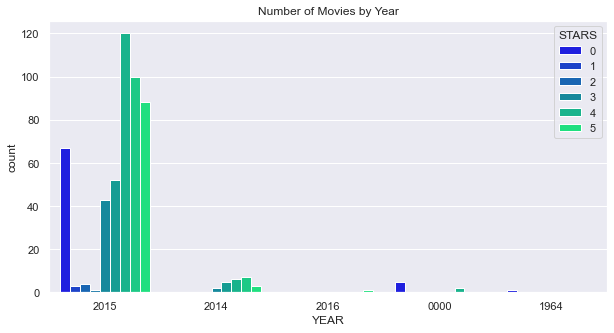

In [15]:
plt.figure(figsize=(10,5))
plt.title('Number of Movies by Year')

sns.countplot(data=fan_df,x='YEAR',hue='STARS',palette='winter')

plt.savefig('assets/fan_df_moviesvsyears.webp',bbox_inches='tight')

In [22]:
temp_df = fan_df.groupby(['YEAR']).mean(numeric_only=True).round(1).reset_index().head(4)

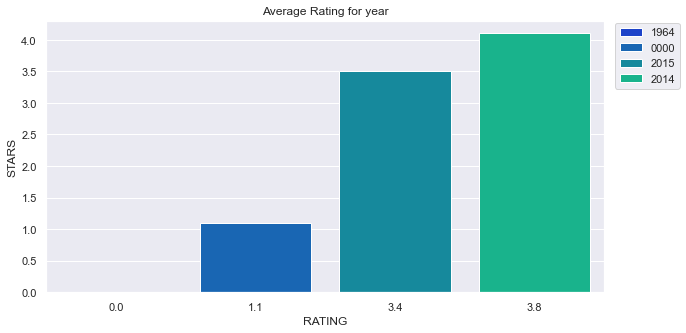

In [23]:
plt.figure(figsize=(10,5))
plt.title('Average Rating for year')

sns.barplot(x='RATING',y='STARS',data=temp_df,palette='winter',hue='YEAR')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/avgRatingvsyear.webp',bbox_inches='tight')

Movies with highest votecount

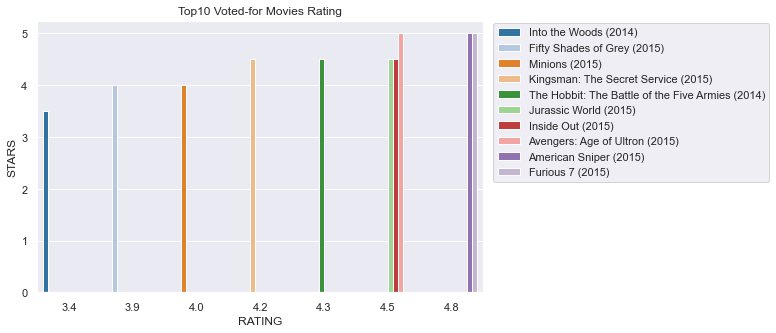

In [26]:
plt.figure(figsize=(8,5))
plt.title('Top10 Voted-for Movies Rating')

sns.barplot(x='RATING',y='STARS',data=fan_df.sort_values(by='VOTES',ascending=False).head(10),palette='tab20',hue='FILM')
plt.legend(bbox_to_anchor=(1.01,1.01))

plt.savefig('assets/fan_df_top10votedfor_movies.webp',bbox_inches='tight')

In [33]:
len(fan_df[fan_df['VOTES']==0])

73

In [38]:
fan_df.drop(fan_df.loc[fan_df['VOTES']==0].index,axis=0,inplace=True)

In [39]:
fan_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


Rating vs Star follow the same distribution?

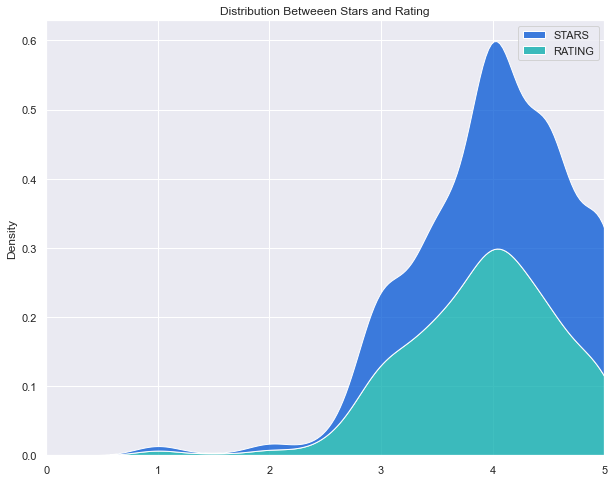

In [41]:
plt.figure(figsize=(10,8))
plt.title('Distribution Betweeen Stars and Rating')

sns.kdeplot(data=fan_df[['STARS','RATING']],multiple='stack',palette='winter')
plt.xlim(0,5)

plt.savefig('assets/fan_df_distri_starsvsrating')

In [42]:
fan_df['RATE_STAR_DIFF'] = (fan_df['STARS']-fan_df['RATING']).round(1)


In [43]:
fan_df.sort_values(by='RATE_STAR_DIFF', ascending=False).head(10)


,FILM,STARS,RATING,VOTES,YEAR,RATE_STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
190,Twinsters (2015),5.0,4.5,44,2015,0.5
161,Leviathan (2014),4.0,3.5,64,2014,0.5
210,The Metropolitan Opera: La Donna del Lago Enco...,4.5,4.0,30,2015,0.5
209,In the Name of my Daughter (2015),4.0,3.5,31,2015,0.5
200,Premam (2015),5.0,4.5,40,2015,0.5
189,Exhibition OnScreen: Matisse (2015),4.5,4.0,45,2015,0.5
169,Royal Ballet: Swan Lake (2015),5.0,4.5,59,2015,0.5
122,Black Sea (2015),4.0,3.5,218,2015,0.5
50,Top Five (2014),4.0,3.5,3223,2014,0.5


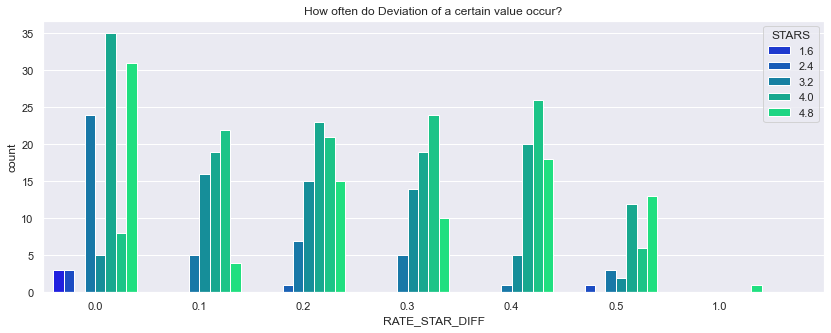

In [44]:
plt.figure(figsize=(14, 5))
plt.title('How often do Deviation of a certain value occur?')

plot = sns.countplot(
    data=fan_df,
    x='RATE_STAR_DIFF',
    hue='STARS',
    palette='winter'
)

plot.set_xticks(np.arange(8))

plt.savefig('assets/fan_df_deviation.webp', bbox_inches='tight')

In [45]:
All_sites_df = pd.read_csv('dataset/fandango_score_comparison.csv')

In [47]:
All_sites_df.head(4).transpose()

,0,1,2,3
FILM,Avengers: Age of Ultron (2015),Cinderella (2015),Ant-Man (2015),Do You Believe? (2015)
RottenTomatoes,74,85,80,18
RottenTomatoes_User,86,80,90,84
Metacritic,66,67,64,22
Metacritic_User,7.1,7.5,8.1,4.7
IMDB,7.8,7.1,7.8,5.4
Fandango_Stars,5.0,5.0,5.0,5.0
Fandango_Ratingvalue,4.5,4.5,4.5,4.5
RT_norm,3.7,4.25,4.0,0.9
RT_user_norm,4.3,4.0,4.5,4.2


ROTTEN TOMATOES

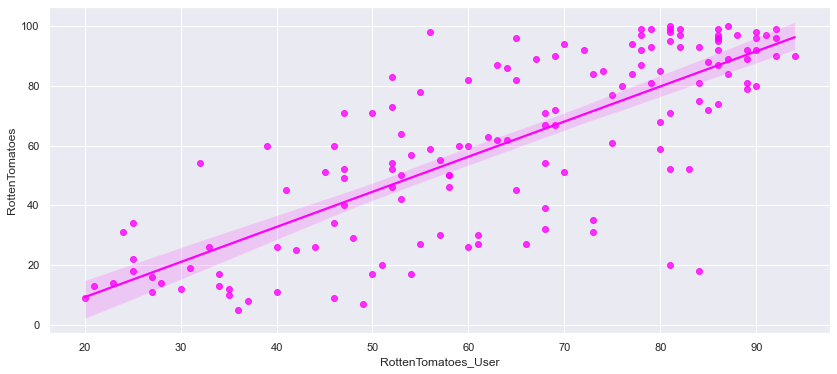

In [50]:
plt.figure(figsize=(14,6))

sns.regplot(x='RottenTomatoes_User',y='RottenTomatoes', data=All_sites_df,ci=95,n_boot=100,color='fuchsia')

plt.savefig('assets/allsites_rotten.webp',bbox_inches='tight')

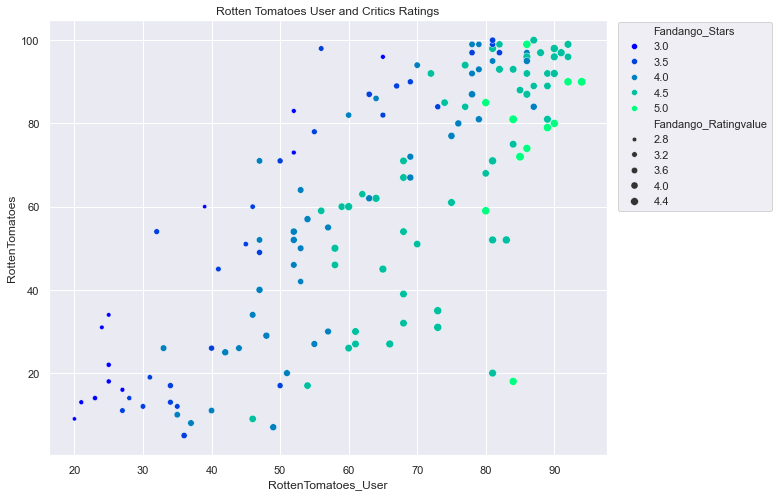

In [52]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    x='RottenTomatoes_User',
    y='RottenTomatoes',
    data=All_sites_df,
    hue='Fandango_Stars',
    palette='winter',
    size='Fandango_Ratingvalue'
).set_title('Rotten Tomatoes User and Critics Ratings')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/allsites_scatterplot_rottentomatoes.webp',bbox_inches='tight')


In [53]:
All_sites_df['RottenTomates_Critics_User_Diff'] = (All_sites_df['RottenTomatoes']-All_sites_df['RottenTomatoes_User'])

In [55]:
All_sites_df['RottenTomates_Critics_User_Diff'].apply(abs).mean()

15.095890410958905

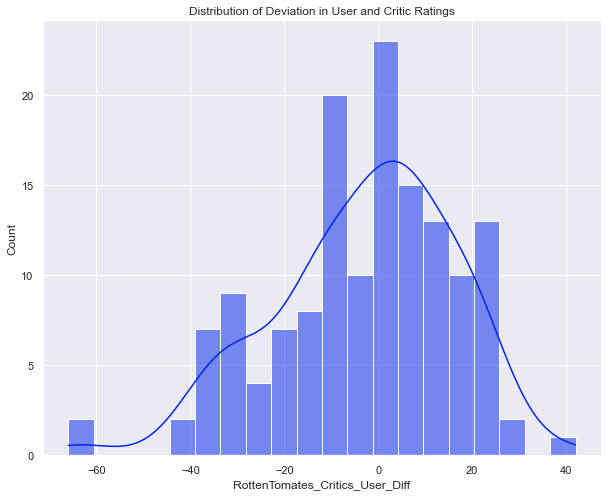

In [57]:
plt.figure(figsize=(10,8))

plt.title('Distribution of Deviation in User and Critic Ratings')

sns.histplot(data=All_sites_df, x='RottenTomates_Critics_User_Diff',bins=20,kde=True)

plt.savefig('assets/allsites_diff_critics.webp',bbox_inches='tight')

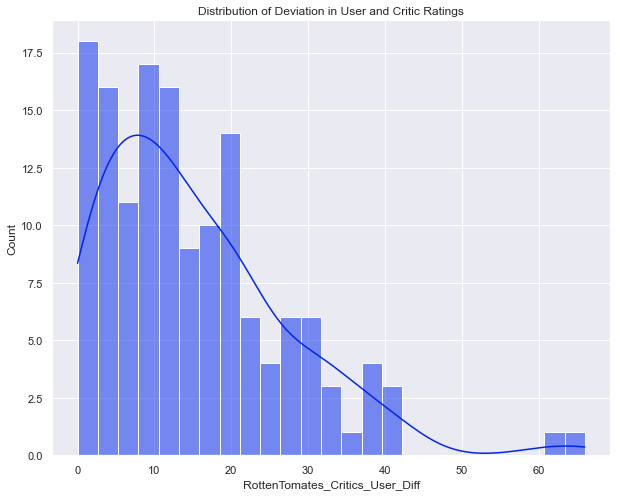

In [58]:
plt.figure(figsize=(10,8))

plt.title('Distribution of Deviation in User and Critic Ratings')

sns.histplot(x=All_sites_df['RottenTomates_Critics_User_Diff'].apply(abs),bins=25,kde=True)

plt.savefig('assets/allsites_diff_critics_abs.webp',bbox_inches='tight')

C:\Users\chara\AppData\Local\Temp\ipykernel_11016\56742494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(


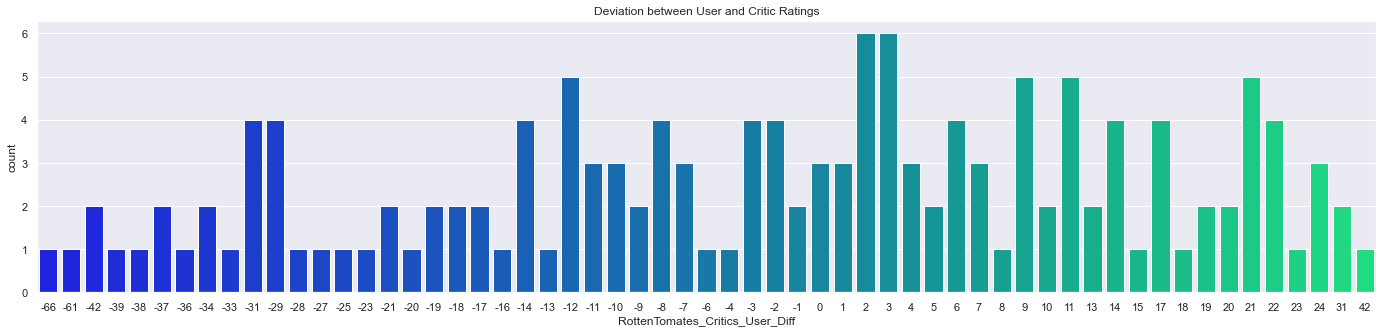

In [64]:
plt.figure(figsize=(24, 5))
plt.title('Deviation between User and Critic Ratings')

plot = sns.countplot(
    data=All_sites_df,
    x='RottenTomates_Critics_User_Diff',
    palette='winter'
)

plt.savefig('assets/allsites_countplot_critic.webp', bbox_inches='tight')

MetaCritics

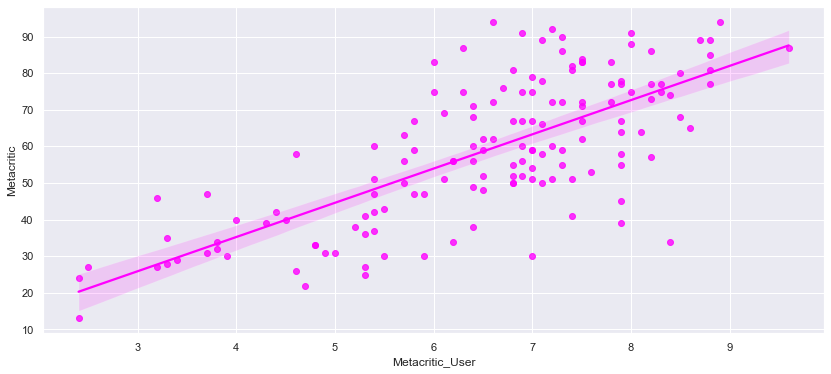

In [65]:
plt.figure(figsize=(14, 6))

sns.regplot(
    x='Metacritic_User',
    y='Metacritic',
    data=All_sites_df,
    ci=95,
    n_boot=1000,
    color='fuchsia'
)

plt.savefig('assets/Allsites_df_MetaCritics.webp', bbox_inches='tight')

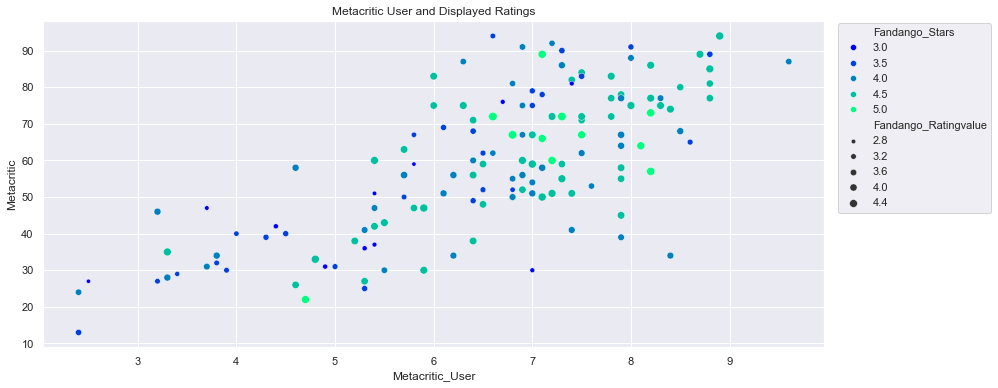

In [66]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='Metacritic_User',
    y='Metacritic',
    data=All_sites_df,
    hue='Fandango_Stars',
    palette='winter',
    size='Fandango_Ratingvalue'
).set_title('Metacritic User and Displayed Ratings')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/allsites_df_scatter.webp', bbox_inches='tight')

Normalized View

In [67]:
# Normalized to the Fandango 0-5 rating system
All_sites_df['RottenTomatoes_Normalized'] = (All_sites_df['RottenTomatoes'] / 20).round(2)
All_sites_df['RottenTomatoes_User_Normalized'] = (All_sites_df['RottenTomatoes_User'] / 20).round(2)
All_sites_df['Metacritic_Normalized'] = (All_sites_df['Metacritic'] / 20).round(2)
All_sites_df['Metacritic_User_Normalized'] = (All_sites_df['Metacritic_User'] / 2).round(2)
All_sites_df['IMDB_Normalized'] = (All_sites_df['IMDB'] / 2).round(2)

In [68]:
All_sites_normed_ratings_df = All_sites_df[[
    'RottenTomatoes_Normalized',
    'RottenTomatoes_User_Normalized',
    'Metacritic_Normalized',
    'Metacritic_User_Normalized',
    'IMDB_Normalized',
    'Fandango_Stars',
    'Fandango_Ratingvalue'
    
]]

All_sites_normed_ratings_df.head(1).T

,0
RottenTomatoes_Normalized,3.70
RottenTomatoes_User_Normalized,4.30
Metacritic_Normalized,3.30
Metacritic_User_Normalized,3.55
IMDB_Normalized,3.90
Fandango_Stars,5.00
Fandango_Ratingvalue,4.50


In [69]:
# move legend in kdeplot
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\chara\AppData\Local\Temp\ipykernel_11016\88804398.py:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


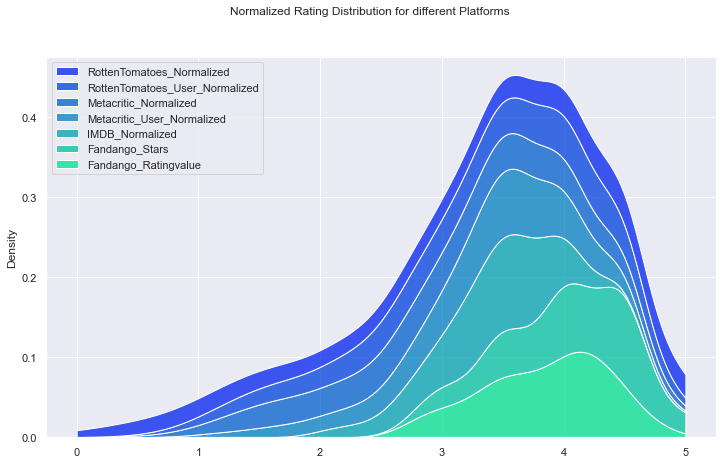

In [71]:
# do all the ratings follow the same distribution?
fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Normalized Rating Distribution for different Platforms')

plot = sns.kdeplot(
    data=All_sites_normed_ratings_df,
    multiple='stack',
    palette='winter',
    clip=[0,5]
)

move_legend(ax, "upper left")
plt.savefig('assets/IMP(allsites_normizedview).webp', bbox_inches='tight')

Clustermap groups movies together by rating. the fandango ratings in the lower right are


All higher (green instead of a blue hue) compared to the rest of the ratings from other platforms

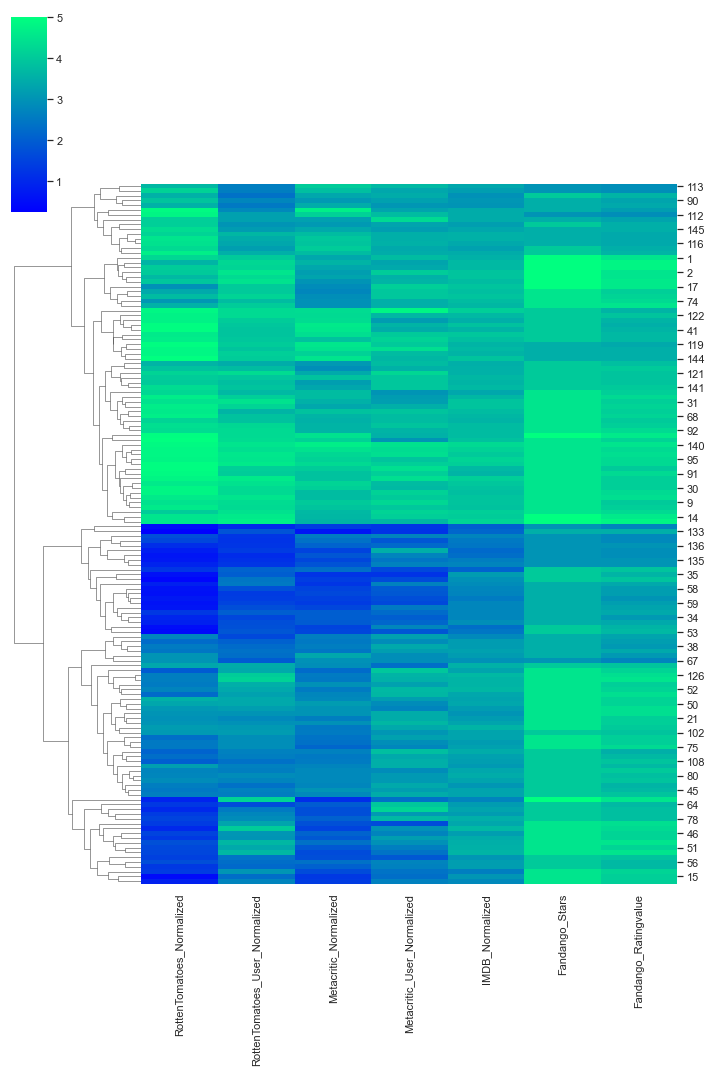

In [73]:
sns.clustermap(
    All_sites_normed_ratings_df,
    figsize=(10, 15),
    cmap='winter',
    annot=False,
    col_cluster=False
)

plt.savefig('assets/allsites_normalized_clusermap.webp', bbox_inches='tight')

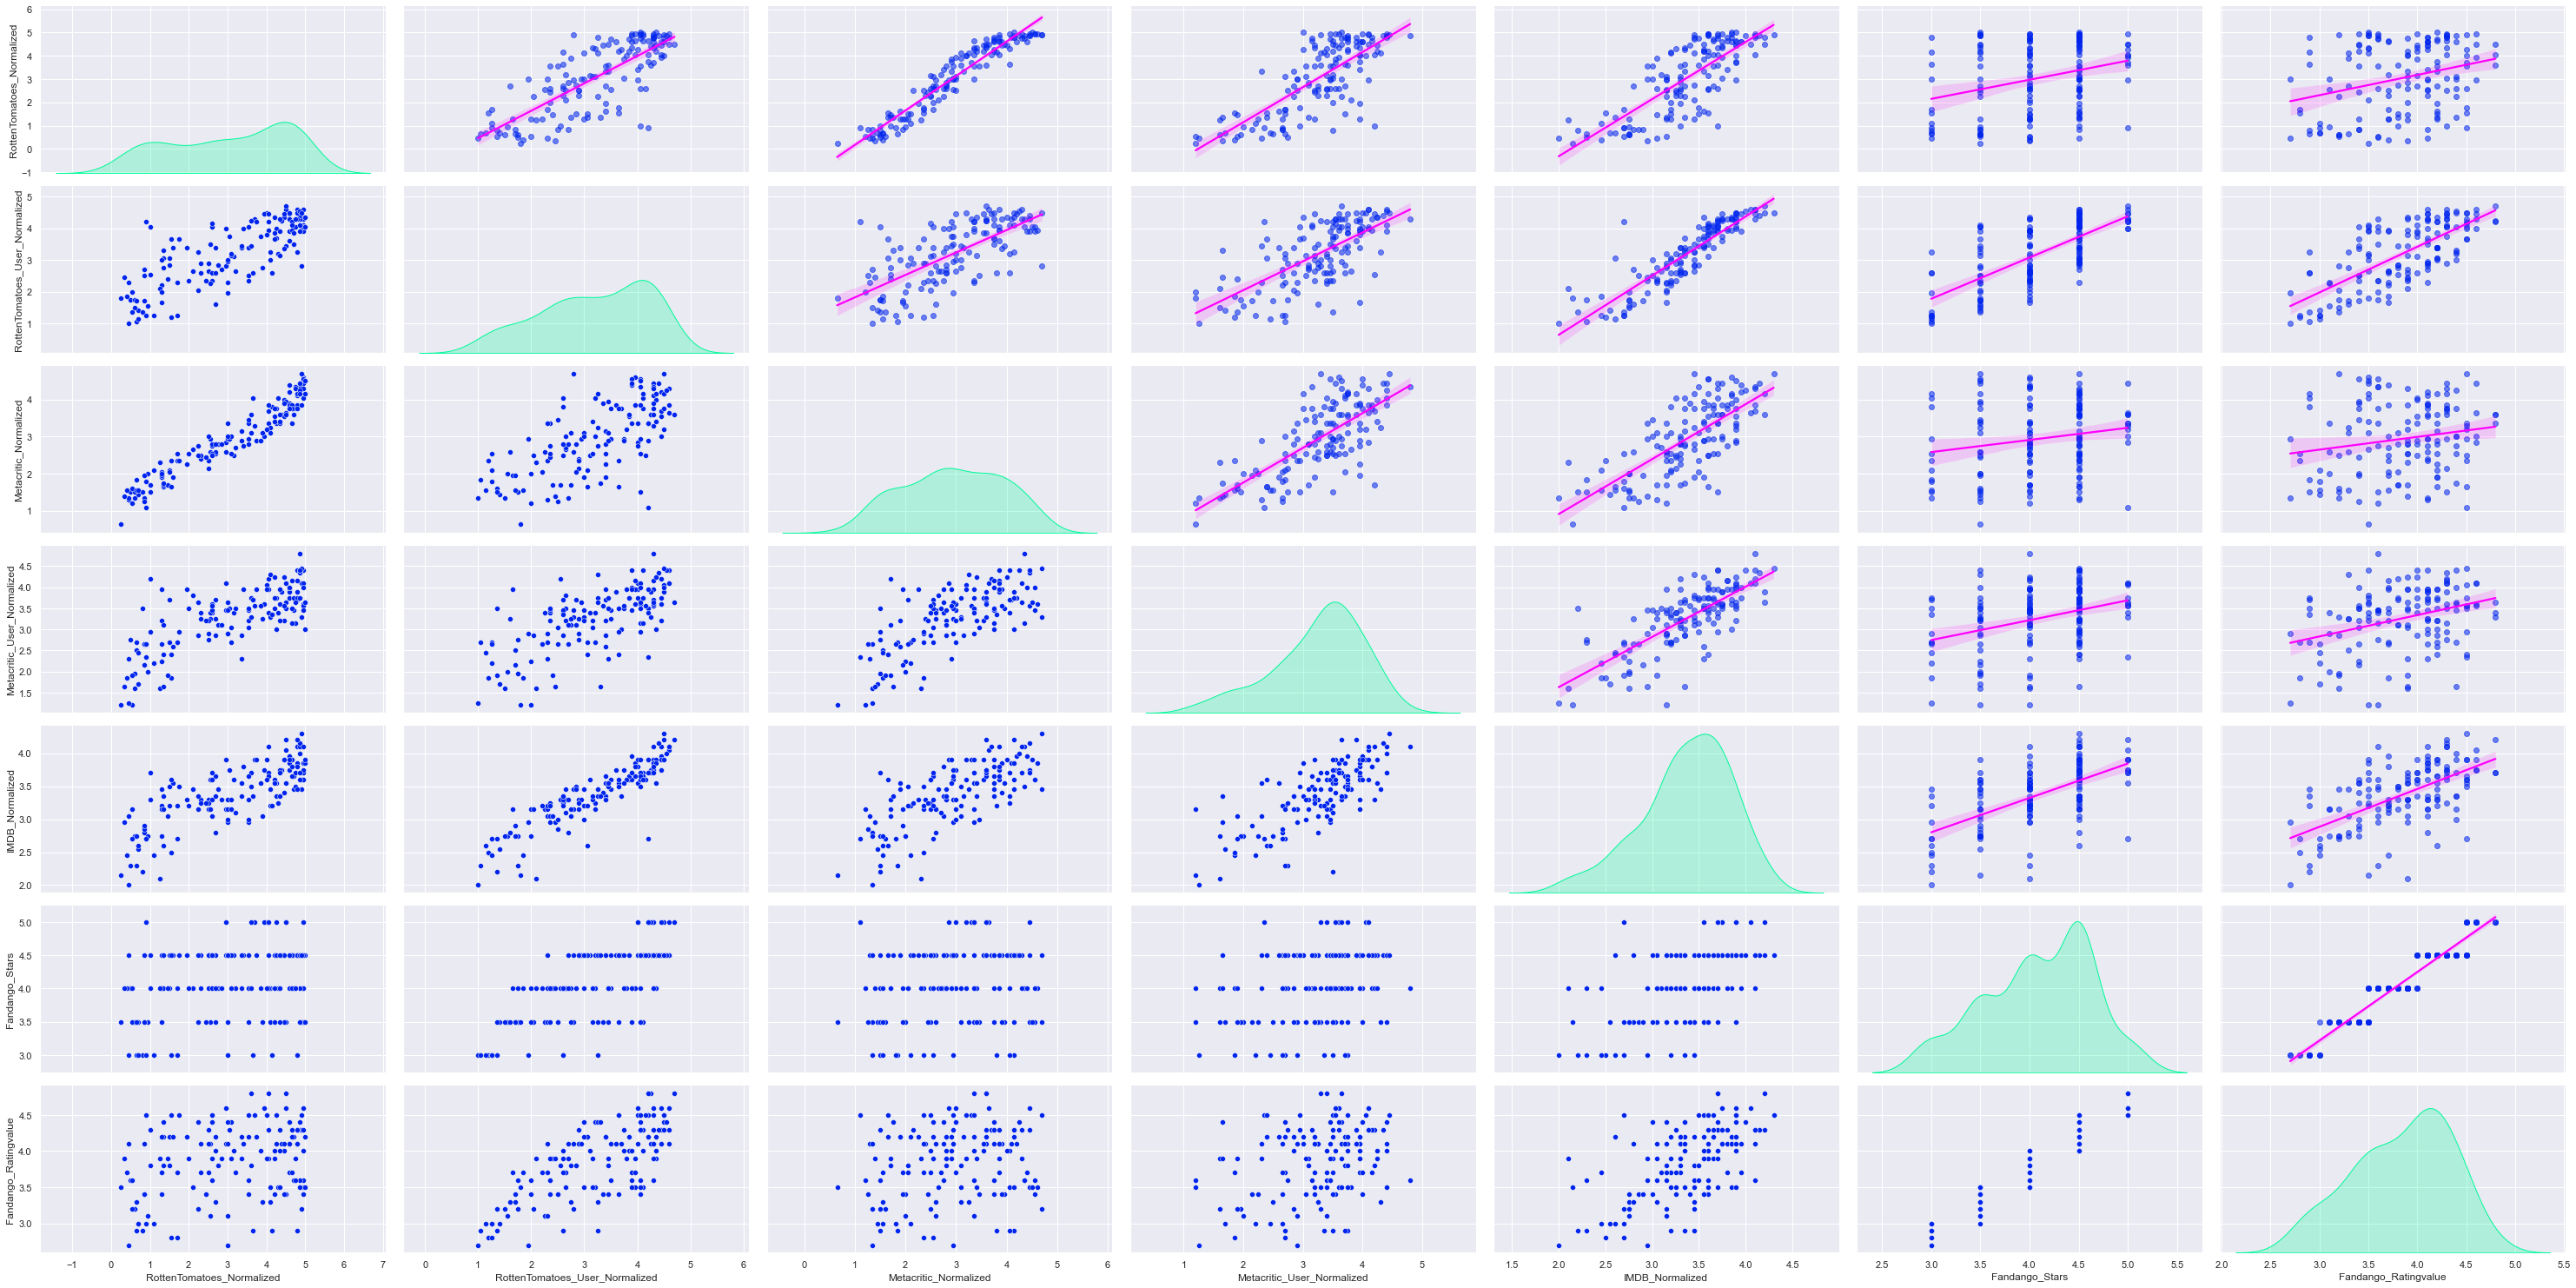

In [74]:
grid = sns.PairGrid(
    data=All_sites_normed_ratings_df,
    height=3,
    aspect=2,
    despine=True
)

grid = grid.map_upper(
    sns.regplot,
    scatter_kws={'alpha':0.55},
    line_kws={'color': 'fuchsia'}
)
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.kdeplot, color='mediumspringgreen', fill=True)


plt.savefig('assets/allsites_normalize_gridplot.webp', bbox_inches='tight')